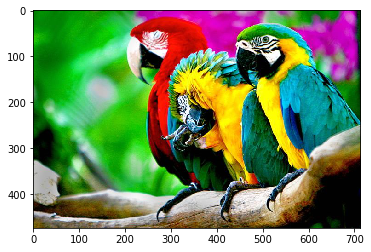

In [51]:
import pandas as pd
import numpy as np

from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

image = imread('parrots.jpg')
plt.imshow(image)

In [67]:
from skimage import img_as_float

image = img_as_float(image)
a, b, c = image.shape
X = image.reshape([a*b,c])

In [75]:
X

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.0745098 , 0.16470588, 0.23529412]])

In [77]:
X = np.array(X)
X


array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.0745098 , 0.16470588, 0.23529412]])

In [70]:
from sklearn.cluster import KMeans
from skimage.measure import compare_psnr

res = {'n_clusters':[], 'PSNR_median':[], 'PSNR_mean':[]}

for i in range(8, 9):
    km = KMeans(n_clusters=i, init='k-means++', random_state=241)
    km.fit(X)
    y = km.labels_
    print(y)
    X_med = np.array(X)
    X_mean = np.array(X)
    for j in range(i):
        X_med[y==i]=np.median(X_med[y==i],axis=0)
        X_mean[y==i]=np.mean(X_mean[y==i],axis=0)
    image_median=X_med.reshape(image.shape[0],image.shape[1],3)
    image_mean=X_mean.reshape(image.shape[0],image.shape[1],3)
    res['n_clusters'].append(i)
    res['PSNR_median'].append(compare_psnr(image, image_median))
    res['PSNR_mean'].append(compare_psnr(image, image_mean))

res_df = pd.DataFrame.from_dict(res)

[4 4 4 ... 0 0 0]


C:\Users\HEKKA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\HEKKA\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\HEKKA\Anaconda3\lib\site-packages\skimage\measure\simple_metrics.py:144: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


In [87]:
X = np.array(X)

res = {'n_clusters':[], 'PSNR_median':[], 'PSNR_mean':[]}

for s in range(8,21):
    kmeans=KMeans(init='k-means++',random_state=241, n_clusters=s)
    kmeans.fit(X)
    y=kmeans.labels_
    X_median=np.array(X)
    X_mean=np.array(X)
    for i in range(s):
        X_median[y==i]=np.median(X_median[y==i],axis=0)
        X_mean[y==i]=np.mean(X_mean[y==i],axis=0)
    image_median=X_median.reshape(image.shape[0],image.shape[1],3)
    image_mean=X_mean.reshape(image.shape[0],image.shape[1],3)
    print(s)
    res['n_clusters'].append(s)
    res['PSNR_median'].append(compare_psnr(image, image_median))
    res['PSNR_mean'].append(compare_psnr(image, image_mean))

res_df = pd.DataFrame.from_dict(res)

8
9
10
11
12
13
14
15
16
17
18
19
20


In [88]:
res_df

,n_clusters,PSNR_median,PSNR_mean
0,8,18.137971,18.436829
1,9,18.813887,19.112673
2,10,19.417473,19.640757
3,11,19.841284,20.127589
4,12,20.304411,20.592516
5,13,20.792764,21.021380
6,14,21.041187,21.296847
7,15,21.406440,21.607172
8,16,21.676273,21.863110
9,17,21.919033,22.119806
